<a href="https://colab.research.google.com/github/amunoz88/Applied_DS_2025/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-3-06aa5b4953db>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(t, params[0] + params[1] * t)


<Axes: xlabel='X', ylabel='Y'>

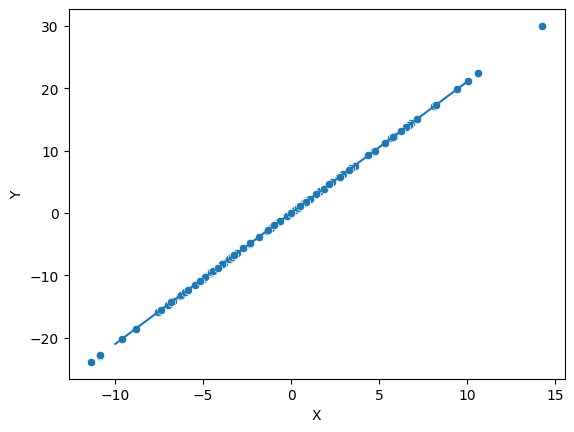

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CUNY 2025/Datasets/regression_data1.csv', index_col=0)
model_smf = smf.ols(formula = 'Y ~ X', data = data)
results_smf = model_smf.fit()
t = np.linspace(-10, 10)
params = results_smf.params
plt.plot(t, params[0] + params[1] * t)
sns.scatterplot(x = 'X', y = 'Y', data = data)

#print(results_smf.summary())

[2.09980572] 0.002819161450647645
0.9999963694819161


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


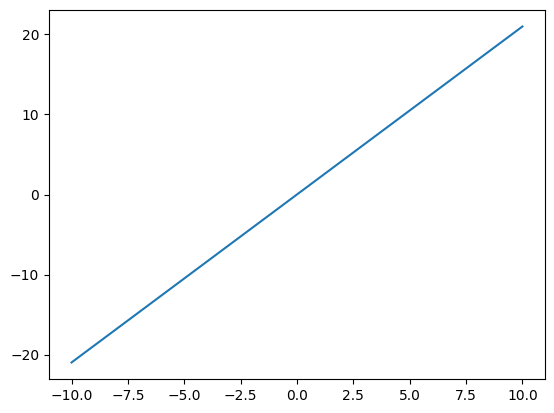

In [ ]:
model_sk = lm.LinearRegression().fit(data[['X']], data['Y'])
print(model_sk.coef_, model_sk.intercept_)
print(model_sk.score(data[['X']], data['Y']))
plt.plot(t, model_sk.predict(t.reshape(-1,1)))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.591e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:05:10   Log-Likelihood:                -1440.9
No. Observations:                1000   AIC:                             2892.
Df Residuals:                     995   BIC:                             2916.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6777      0.415     -4.043      0.0

<Axes: xlabel='X', ylabel='Y'>

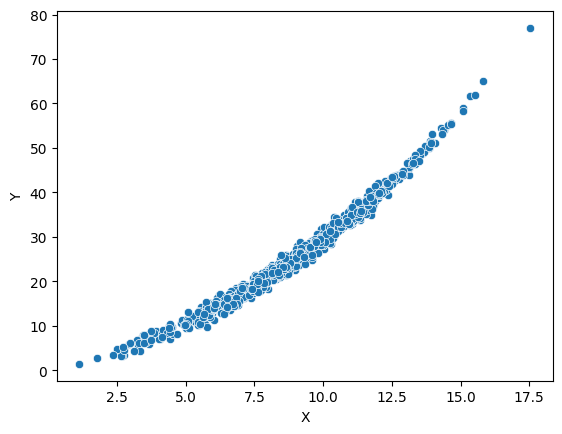

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CUNY 2025/Datasets/regression_data6.csv', index_col=0)
model = smf.ols(formula = 'Y ~ X + X2 +I(X2**2) + I(X3**3)', data = data)
results = model.fit()
print(results.summary())
sns.scatterplot(x = 'X', y = 'Y', data = data)
#plt.plot(data['X'], results.predict(), color = 'red'

In [ ]:
X1 = np.random.normal(0, 1, 1000)
X2 = np.random.exponential(1, 1000)

Y = X1 + X2 **2 + np.random.normal(0, 1, 1000)

bucket_boundaries_1 = np.linspace(-10, 10, 10)
bucket_boundaries_2 = np.linspace(0,20, 10)
data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})


print(data)
# model = smf.ols(formula = 'Y ~ X1', data = data)
# results = model.fit()
# print(results.summary())
# sns.scatterplot(x = 'X1', y = 'Y', data = data)
# sns.lineplot(x = 'X1', y = results.predict(data.sort_values(by='X1')), data = data)

In [ ]:
# prompt: round elements in array to given bucket limits

import pandas as pd
import numpy as np
bucket_boundaries_1 = np.linspace(-10, 10, 10)
bucket_boundaries_2 = np.linspace(0,20, 10)

def round_to_buckets(data, column_name, bucket_boundaries):
    """Rounds elements in a Pandas DataFrame column to specified bucket limits.

    Args:
        data: The input Pandas DataFrame.
        column_name: The name of the column to round.
        bucket_boundaries: A NumPy array of bucket boundaries.

    Returns:
        A new Pandas DataFrame with the specified column rounded to the nearest bucket boundary.
    """

    # Find the closest bucket boundary for each value
    rounded_values = np.digitize(data[column_name], bucket_boundaries)

    # Use the bucket index to get the corresponding bucket boundary
    rounded_column = bucket_boundaries[np.clip(rounded_values - 1, 0, len(bucket_boundaries)-2)]

    #Create a copy to avoid modifying original DataFrame
    new_data = data.copy()
    new_data[column_name + '_rounded'] = rounded_column

    return new_data


# Example usage with your existing data and bucket boundaries:
# Assuming you have already defined data, X1, X2, Y, bucket_boundaries_1, and bucket_boundaries_2 as in your previous code.
#sns.scatterplot(x = 'X1_rounded', y = 'Y', data = data)

In [ ]:
X1 = np.random.normal(0, 1, 10000)
X2 = np.random.exponential(1, 10000)

data = pd.DataFrame({'X1': X1, 'X2': X2})

data = round_to_buckets(data, 'X1', bucket_boundaries_1)
data = round_to_buckets(data, 'X2', bucket_boundaries_2)

data['Y'] = data.X1_rounded + data.X2_rounded**2 + np.random.normal(0, 1, 10000)
print(data)

model = smf.ols(formula = 'Y ~ X1_rounded + I(X2_rounded**2)', data = data)
results = model.fit()
print(results.summary())


data['pred'] = results.predict(data.sort_values(by='X1_rounded'))
print(data) #- 2.6 * np.mean(data['Y'])
S = data.groupby(['X1_rounded','X2_rounded']).agg(['mean', 'count'])
print(S)
S.Y - S.pred

          Team     Against  Spread
0        Bills    Dolphins    -1.5
1      Raiders      Ravens    -8.5
2   Buccaneers       Lions    -6.5
3     Panthers    Chargers    -5.5
4      Packers       Colts     4.5
5       Saints    Patriots    -3.0
6    Cardinals      Giants    -3.0
7      Falcons       Bears    -2.5
8       Titans      Texans     1.5
9       Browns    Steelers    -1.0
10     Jaguars      Chiefs    -6.5
11       49ers        Rams     3.0
12    Seahawks     Bengals    -3.0
13     Vikings      Eagles    -5.0
14     Broncos  Commanders    -2.5
15     Cowboys        Jets    -1.0
          Team     Against  Spread  rank_diff
0        Bills    Dolphins    -1.5         -1
1      Raiders      Ravens    -8.5         24
2   Buccaneers       Lions    -6.5         10
3     Panthers    Chargers    -5.5         15
4      Packers       Colts     4.5         -8
5       Saints    Patriots    -3.0         -1
6    Cardinals      Giants    -3.0         -5
7      Falcons       Bears    -2.5   

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<Axes: xlabel='rank_diff', ylabel='Spread'>

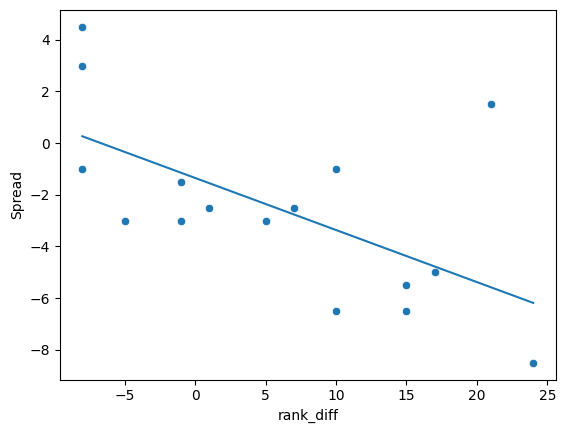

In [ ]:
rankings = pd.read_csv("/content/drive/MyDrive/CUNY 2025/Datasets/nfl_rankings.csv", index_col=0)
spreads = pd.read_csv("/content/drive/MyDrive/CUNY 2025/Datasets/spreads.csv")
rank_diffs = []
print(spreads)
for i,row in spreads.iterrows():
  t1 = row.Team
  t2 = row.Against
  rank_diff = rankings.loc[rankings.Team == t1, 'Rank'].values - rankings.loc[rankings.Team == t2, 'Rank'].values
  rank_diffs.append(rank_diff[0])

spreads['rank_diff'] = rank_diffs
print(spreads)
m = smf.ols(formula = 'Spread ~ rank_diff', data = spreads).fit()
print(m.summary())
sns.scatterplot(x = 'rank_diff', y = 'Spread', data = spreads)
spreads['predict'] = m.predict()
sns.lineplot(x = 'rank_diff', y = 'predict', data = spreads.sort_values(by='rank_diff'))

In [ ]:

def create_ranking_diff_df(df):
    """
    Creates a new DataFrame with team names and ranking differences.

    Args:
        df: The input pandas DataFrame with 'team' and 'ranking' columns.

    Returns:
        A new pandas DataFrame or None if the input DataFrame is invalid.
    """

    if not isinstance(df, pd.DataFrame):
      return None

    if not {'team', 'ranking'}.issubset(df.columns):
        return None  # Handle cases where columns are missing

    if len(df) < 2:  # Need at least two rows for comparison
        return None

    new_data = []
    for i in range(0, len(df) - 1, 2):  # Iterate in steps of 2
        team1 = df['team'].iloc[i]
        rank1 = df['ranking'].iloc[i]

        if i + 1 < len(df): # Check if the next row exists
            for j in range(i )
            team2 = df['team'].iloc[i + 1]
            rank2 = df['ranking'].iloc[i + 1]
            rank_diff = rank1 - rank2  # Absolute difference
            new_data.extend([{'team': team1}, {'team': team2}, {'ranking_difference': rank_diff}])
        else: # Handle the case where there's an odd number of rows
            new_data.extend([{'team': team1}])


    if new_data: # If the list isn't empty after the loop
        new_df = pd.DataFrame(new_data)
        return new_df
    else:
        return None